In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image

In [4]:
# Load data

image_dir = "CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


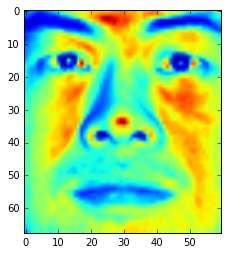

In [5]:
plt.imshow(imgs[1]) # Display first image

In [8]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width*height

# Compute input matrix X
X_list = [np.reshape(imgs[i].getdata(), (wh)) for i in range(n)]
X = np.array(X_list)
print(X.shape)

(38, 4080)


In [9]:
# Subtract the mean image from input matrix X
mX = ...